In [1]:
%matplotlib inline
import numpy as np
import quantfin as qf
import matplotlib.pyplot as plt

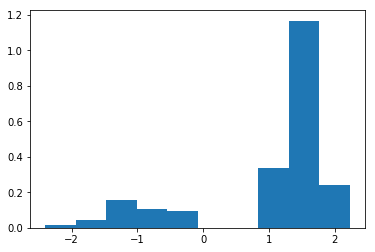

In [2]:
# Sample data from a mixed Gaussian distribution
N = 250
x = qf.random.sample.mixed_gaussian(1.5, 0.25, -1.0, 0.5, 0.8, shape=(N,))
plt.hist(x, density=True);

In [3]:
# Fit a mixed Gaussian distribution to the data
mus, sigmas, rs = qf.stats.fit_mixed_gaussian(x, 2, epsilon=1e-5)

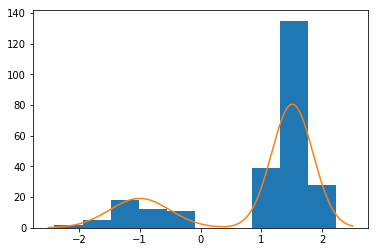

In [6]:
# Plot the fitted distribution over the random data
ts = np.linspace(-2.5, 2.5, 250)
y = qf.stats.pdfs.mixed_gaussian(ts, mus, sigmas, rs)
plt.hist(x)
plt.plot(ts, y*N);

In [5]:
# Errors in estimated parameters
print(mus - [1.5, -1.0])
print(sigmas - [0.25, 0.5])
print(rs - [0.8, 0.2])

[ 0.00655698 -0.0002131 ]
[-0.02033221 -0.00549489]
[ 0.00793253 -0.00793253]
